<a href="https://colab.research.google.com/github/ErfanAsadi/Image-Proccessing/blob/main/dct_for_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why DCT is good for compression ?
In this file, We are going to remove high and low frequencies from dct of an image and see what will happen to the image.
As you'll see, low frequency components of an image in frequency domain will save lots of image information, this mean that dct is a good tool for lossy compression.

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pywt
import math

### Defining PSNR metric function 

In [ ]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

### Reading zebra image

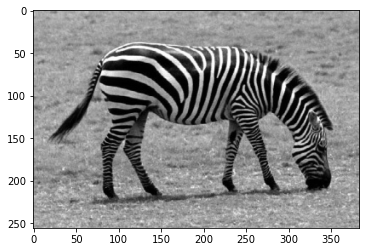

In [ ]:
img = cv.imread('zebra.JPG')
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

In [ ]:
 float_image = gray_image.astype('float')
 img_dct = cv.dct(float_image)

# High Frequecy Remove 
In this part, we are going to remove high frequency components from dct of and image and then transform it to the spatial domain to see what happens to the image.

In [ ]:
high_edited_image8 = np.zeros(img_dct.shape)
high_edited_image4 = np.zeros(img_dct.shape)
high_edited_image2 = np.zeros(img_dct.shape)

### Removing 1/2 High Frequency

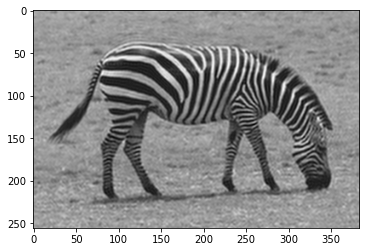

In [ ]:
high_edited_image2[0: int(img_dct.shape[0] / 2), 0: int(img_dct.shape[1] / 2)] = img_dct[0: int(img_dct.shape[0] / 2), 0: int(img_dct.shape[1] / 2)]
img_recor2 = cv.idct(high_edited_image2)
plt.imshow(img_recor2, cmap="gray")

In [ ]:
psnr_low_2=psnr(gray_image, img_recor2)
print('PSNR is: ', psnr_low_2)

PSNR is:  28.449307888002338


### Removing 1/4 Frequency

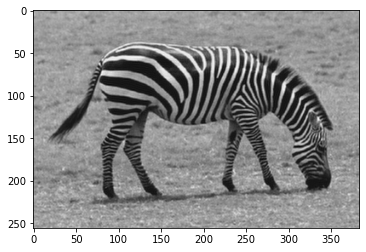

In [ ]:
high_edited_image4[0: int(3 * img_dct.shape[0] / 4), 0: int(3 * img_dct.shape[1] / 4)] = img_dct[0: int(3 * img_dct.shape[0] / 4), 0: int(3 * img_dct.shape[1] / 4)]
img_recor4 = cv.idct(high_edited_image4)
plt.imshow(img_recor4, cmap="gray")

In [ ]:
psnr_low_4=psnr(gray_image, img_recor4)
print('PSNR is: ', psnr_low_4)

PSNR is:  34.78311265721422


### Removing 1/8 Frequency

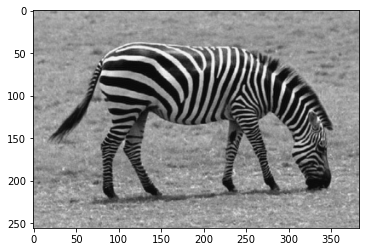

In [ ]:
high_edited_image8[0: int(7 * img_dct.shape[0] / 8), 0: int(7 * img_dct.shape[1] / 8)] = img_dct[0: int(7 * img_dct.shape[0] / 8), 0: int(7 * img_dct.shape[1] / 8)]
img_recor8 = cv.idct(high_edited_image8)
plt.imshow(img_recor8, cmap="gray")

In [ ]:
psnr_low_8=psnr(gray_image, img_recor8)
print('PSNR is: ', psnr_low_8)

PSNR is:  38.51472744968537


# Low Frequency Remove
Let's go to remove low frequency components to see the results. 

In [ ]:
low_edited_image8 = np.zeros(img_dct.shape)
low_edited_image4 = np.zeros(img_dct.shape)
low_edited_image2 = np.zeros(img_dct.shape)

### Removing 1/2 Frequency

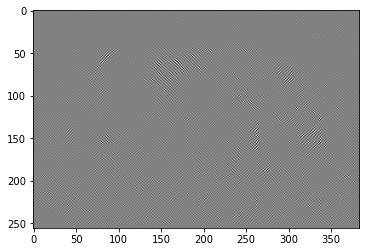

In [ ]:
low_edited_image2[int(img_dct.shape[0] / 2): img_dct.shape[0], int(img_dct.shape[1] / 2): img_dct.shape[1]] = img_dct[int(img_dct.shape[0] / 2): img_dct.shape[0], int(img_dct.shape[1] / 2): img_dct.shape[1]]
low_img_recor2 = cv.idct(low_edited_image2)
plt.imshow(low_img_recor2, cmap="gray")

In [ ]:
psnr_high_2=psnr(gray_image, low_img_recor2)
print('PSNR is: ', psnr_high_2)

PSNR is:  5.106929890819912


### Removing 1/4 Frequency

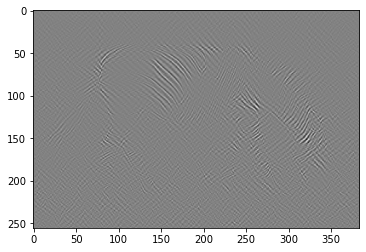

In [ ]:
low_edited_image4[int(img_dct.shape[0] / 4): img_dct.shape[0], int(img_dct.shape[1] / 4): img_dct.shape[1]] = img_dct[int(img_dct.shape[0] / 4): img_dct.shape[0], int(img_dct.shape[1] / 4): img_dct.shape[1]]
low_img_recor4 = cv.idct(low_edited_image4)
plt.imshow(low_img_recor4, cmap="gray")

In [ ]:
psnr_high_4 = psnr(gray_image, low_img_recor4)
print('PSNR is: ', psnr_high_4)

PSNR is:  5.120333487539681


### Removing 1/8 Frequency

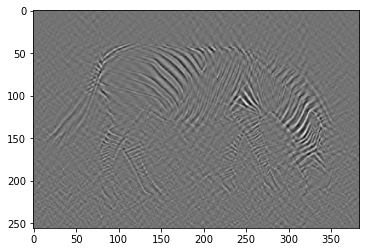

In [ ]:
low_edited_image8[int(img_dct.shape[0] / 8): img_dct.shape[0], int(img_dct.shape[1] / 8): img_dct.shape[1]] = img_dct[int(img_dct.shape[0] / 8): img_dct.shape[0], int(img_dct.shape[1] / 8): img_dct.shape[1]]
low_img_recor8 = cv.idct(low_edited_image8)
plt.imshow(low_img_recor8, cmap="gray")

In [ ]:
psnr_high_8=psnr(gray_image, low_img_recor8)
print('PSNR is: ', psnr_high_8)

PSNR is:  5.165135993941885
